# Web Mining Final Project
## Dalton J. Francis


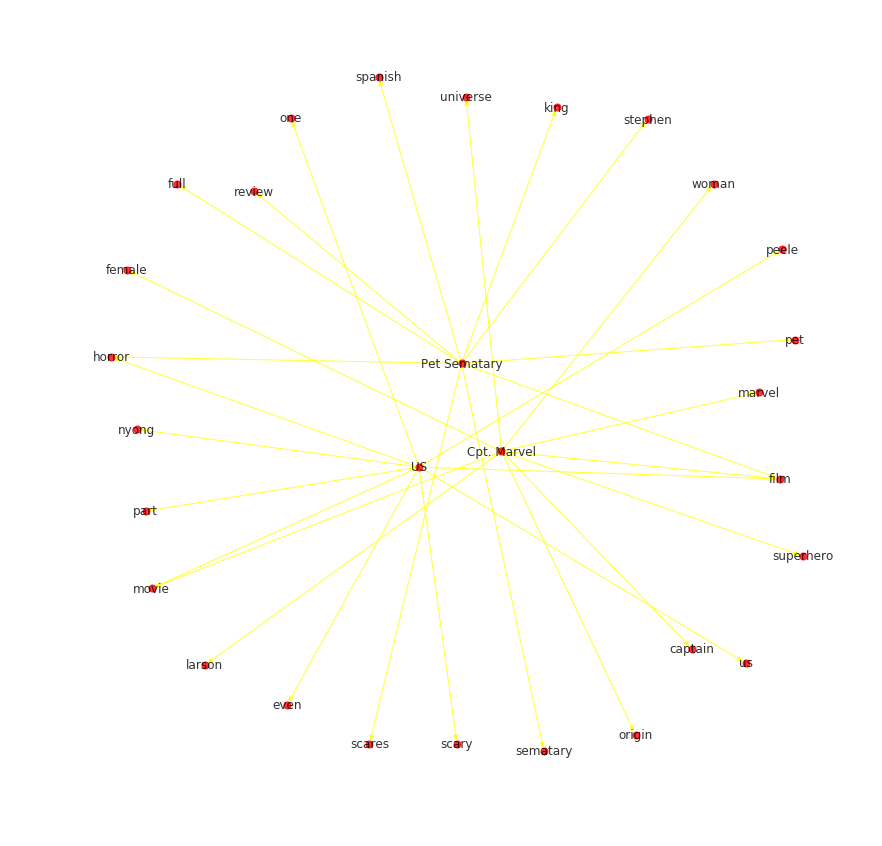

In [28]:
import pickle
import requests
from bs4 import BeautifulSoup
import nltk
import numpy
import matplotlib.pyplot as plt
import networkx as nx
from nl import score_sentences
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
##nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')


def tf(term,doc):
    tokens = doc.lower().split()
    return tokens.count(term.lower())
    
def pullReviews(url):
    tempCritReviews=[]
    tempCritSents=[]
    tempAudiReviews=[]
    tempAudiSents=[]
    for i in range(3):
        r = requests.get(url+'?page='+str(i+1)+'&sort=')
        soup = BeautifulSoup(r.text,'html5lib')
        divs = soup.findAll('div',{"class":"the_review"})
        for rev in divs:
            tempCritReviews.append(rev.text) ##4 pages of reviews, 20 reviews per page
            tempCritSents.extend(sent_tokenize(rev.text))
    for i in range(3):
        r = requests.get(url+'?page='+str(i+1)+'&type=user')
        soup = BeautifulSoup(r.text,'html5lib')
        divs = soup.findAll('div',{"class":"user_review"})
        for rev in divs:
            tempAudiReviews.append(rev.text) 
            tempAudiSents.extend(sent_tokenize(rev.text))
    return tempCritReviews,tempCritSents,tempAudiReviews,tempAudiSents

def vocabCheck(reviews):
    words = list()
    stopwords = set(nltk.corpus.stopwords.words('english'))
    stopwords.add("'s")
    stopwords.add("n't")
    stopwords.add("``")
    stopwords.add("...")
    stopwords.add("''")
    for i in reviews:
        words.extend(map(lambda x: x.lower(),nltk.tokenize.word_tokenize(i)))
    for punctuation in ",.'?''`:;’”“`]['-": #the last three are unicode characters of weird quotes. (python is unicode aware)
        stopwords.add(punctuation) #adds those individual punctuation to the stopwords to be filtered
    freqDist = nltk.FreqDist(words)
    sorted_terms = sorted(freqDist.items(), key=lambda x: x[1], reverse=True)
    tenMostCommon = [word[0] for word in sorted_terms if word[0] not in stopwords][:10]
    return tenMostCommon

def sentimentCheck(reviews):
    analyzer = SentimentIntensityAnalyzer()
    avgPolarity=0
    positiveReviews=[]
    negativeReviews=[]
    for review in reviews:
        if(analyzer.polarity_scores(review)['pos']>analyzer.polarity_scores(review)['neg']):
            positiveReviews.append(review)
            avgPolarity+=analyzer.polarity_scores(review)['compound'] #if review is mostly positive, add positive value
        elif(analyzer.polarity_scores(review)['pos']<analyzer.polarity_scores(review)['neg']):
            negativeReviews.append(review)
            avgPolarity+=analyzer.polarity_scores(review)['compound'] #if review is mostly negative, add the inverse of the negative value

    avgPolarity=avgPolarity/len(reviews) #any review with exact neutral values would just add 0.
    print('pos list: ',len(positiveReviews))
    print('neg list: ',len(negativeReviews))
    print('avg pol: ',avgPolarity)

def summarize(sentences, important_words, cthresh=5, top_sentences=5):
    scores = score_sentences(sentences,important_words)
    avg = numpy.mean(scores)
    std_dev = numpy.std(scores)
    score_threshold = avg + 0.5 * std_dev
    mean_scored = [t[0] for t in enumerate(scores) if t[1] > score_threshold]
    sorted_scores = sorted(enumerate(scores),key=lambda x: x[1],reverse=True)[:top_sentences]
    sorted_indices = sorted([s[0] for s in sorted_scores])
    return {'top-n': ' '.join([sentences[i] for i in sorted_indices]),'mean-score': ' '.join([sentences[i] for i in mean_scored])}

def graphCommon(filmNode, graph, important_words):
    for word in important_words:
        graph.add_node(word,type='word')
        graph.add_edge(filmNode,word,type='describes')
    
#criticReviews1,criticSents1,audienceReviews1,audienceSents1=pullReviews('https://www.rottentomatoes.com/m/captain_marvel/reviews/')
#with open('criticReviews1.pkl','wb') as f:
#    pickle.dump(criticReviews1,f)
#with open('criticSents1.pkl','wb') as f:
#    pickle.dump(criticSents1,f)
#with open('audienceReviews1.pkl','wb') as f:
#    pickle.dump(audienceReviews1,f)
#with open('audienceSents1.pkl','wb') as f:
#    pickle.dump(audienceSents1,f)

#criticReviews2,criticSents2,audienceReviews2,audienceSents2=pullReviews('https://www.rottentomatoes.com/m/pet_sematary_2019/reviews/')
#with open('criticReviews2.pkl','wb') as f:
#    pickle.dump(criticReviews2,f)
#with open('criticSents2.pkl','wb') as f:
#    pickle.dump(criticSents2,f)
#with open('audienceReviews2.pkl','wb') as f:
#    pickle.dump(audienceReviews2,f)
#with open('audienceSents2.pkl','wb') as f:
#    pickle.dump(audienceSents2,f)

#criticReviews,criticSents,audienceReviews,audienceSents=pullReviews('https://www.rottentomatoes.com/m/us_2019/reviews/')
#with open('criticReviews.pkl','wb') as f:
#    pickle.dump(criticReviews,f)
#with open('criticSents.pkl','wb') as f:
#    pickle.dump(criticSents,f)
#with open('audienceReviews.pkl','wb') as f:
#    pickle.dump(audienceReviews,f)
#with open('audienceSents.pkl','wb') as f:
#    pickle.dump(audienceSents,f)

with open('criticReviews.pkl','rb') as f:
    criticReviews = pickle.load(f)
with open('criticSents.pkl','rb') as f:
    criticSents = pickle.load(f)
with open('audienceReviews.pkl','rb') as f:
    audienceReviews = pickle.load(f)
with open('audienceSents.pkl','rb') as f:
    audienceSents = pickle.load(f)

with open('criticReviews1.pkl','rb') as f:
    criticReviews1 = pickle.load(f)
with open('criticSents1.pkl','rb') as f:
    criticSents1 = pickle.load(f)
with open('audienceReviews1.pkl','rb') as f:
    audienceReviews1 = pickle.load(f)
with open('audienceSents1.pkl','rb') as f:
    audienceSents1 = pickle.load(f)

with open('criticReviews2.pkl','rb') as f:
    criticReviews2 = pickle.load(f)
with open('criticSents2.pkl','rb') as f:
    criticSents2 = pickle.load(f)
with open('audienceReviews2.pkl','rb') as f:
    audienceReviews2 = pickle.load(f)
with open('audienceSents2.pkl','rb') as f:
    audienceSents2 = pickle.load(f)


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
commonWordsGraph = nx.DiGraph()
for i in range(3):
    if i == 0:
        commonWordsGraph.add_node('US',type='film')
        graphCommon('US',commonWordsGraph,vocabCheck(criticSents))
    if i == 1:
        commonWordsGraph.add_node('Cpt. Marvel',type='film')
        graphCommon('Cpt. Marvel',commonWordsGraph,vocabCheck(criticSents1))
    if i == 2:
        commonWordsGraph.add_node('Pet Sematary',type='film')
        graphCommon('Pet Sematary',commonWordsGraph,vocabCheck(criticSents2))
        
labels = {n:n for n in commonWordsGraph.nodes()}
nx.draw(commonWordsGraph,pos=nx.spring_layout(commonWordsGraph),arrows=True,ax=ax,node_size=50,edge_color='#ffff00',alpha=0.8,labels=labels,fonr_size=8)

#vocabCheck(criticSents)
#vocabCheck(audienceReviews)
#sentimentCheck(criticReviews)
#sentimentCheck(audienceReviews)
#summarize(criticSents,vocabCheck(criticSents))
#summarize(audienceSents,vocabCheck(audienceSents))